In [1]:
# from elasticsearch import Elasticsearch
from numpy.random import shuffle
import logging
logging.getLogger('tensorflow').disabled = True
import os
import re
import json
import urllib
import string
import pandas as pd
from random import sample
import nltk
from nltk.corpus import stopwords
import keras
from keras import Model
from keras.optimizers import RMSprop
from keras.regularizers import l2
from keras.layers import TimeDistributed, CuDNNGRU, Input, \
    Embedding, Dropout, Bidirectional, CuDNNLSTM, concatenate, \
    Dense, GRU
from keras.utils import to_categorical, normalize, plot_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, average_precision_score, \
    precision_recall_curve
# import csv

Using TensorFlow backend.


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english') + list(string.punctuation))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# es = Elasticsearch([{ 'host': 'localhost', 'port': 9200 }])

In [0]:
"""
def queryBuilder(port, period): 
    return {
        "size": 10000,
        "query": {
            "bool": {
                "must": [{
                    "term": {
                        "port": port
                    }
                }, {
                    "range": {
                        "@timestamp": {
                            "gte": period[0],
                            "lt": period[1]
                        }
                    }
                }],
                "must_not": [{
                    "match": {
                        "status": "Error"
                    }
                },{
                    "prefix": {
                        "path": "node_modules"
                    }
                },{
                    "prefix": {
                        "path": "public"
                    }
                }, {
                    "prefix": {
                        "path": "private"
                    }
                }, {
                   "prefix": {
                       "path": "favicon"
                   } 
                }, {
                    "prefix": {
                        "path": "css"
                    }
                }, {
                    "prefix": {
                        "path": "dist"
                    }
                }]
            }
        }
    }
"""

'\ndef queryBuilder(port, period): \n    return {\n        "size": 10000,\n        "query": {\n            "bool": {\n                "must": [{\n                    "term": {\n                        "port": port\n                    }\n                }, {\n                    "range": {\n                        "@timestamp": {\n                            "gte": period[0],\n                            "lt": period[1]\n                        }\n                    }\n                }],\n                "must_not": [{\n                    "match": {\n                        "status": "Error"\n                    }\n                },{\n                    "prefix": {\n                        "path": "node_modules"\n                    }\n                },{\n                    "prefix": {\n                        "path": "public"\n                    }\n                }, {\n                    "prefix": {\n                        "path": "private"\n                    }\n         

In [0]:
"""
def fetch_data(period):
    attack_ports = {
        '43334': 'xss',
        '43335': 'sqlinj',
        '43343': 'tampering',
        '43344': 'xxe'
    }
    normal_ports = {
        '43333': 'normal',
        '43336': 'normal',
        '43337': 'normal',
        '43338': 'normal',
        '43339': 'normal',
        '43340': 'normal'
    }
    
    normal = []
    for p in normal_ports:
        for i in es.search(index='http_log-*', body=queryBuilder(int(p), period))['hits']['hits']:
            try:
                temp = []
                temp.append(i['_id'])
                temp.append(i['_source']['@timestamp'])
                temp.append(i['_source']['http']['request']['params'])
                temp.append(i['_source']['path'])
                try:
                    temp.append(i['_source']['http']['request']['body'])
                except:
                    temp.append("")
                temp.append(i['_source']['http']['response']['code'])
                temp.append(i['_source']['method'])
                temp.append('normal')
                normal.append(temp)
            except:
                continue

    print("Normal dataset before truncated: %d" % len(normal))
    sample_size = 3000
    normal = sample(normal, sample_size)
    df = pd.DataFrame(normal, columns=['id', 'timestamp', 'params', 'path',
                                       'request_body', 'response_code',
                                       'method', 'label'])
    print("Normal dataset after truncated: %d" % len(df))

    for p in attack_ports:
        atks = []
        for i in es.search(index='http_log-*', body=queryBuilder(int(p), period))['hits']['hits']:
            try:
                temp = []
                temp.append(i['_id'])
                temp.append(i['_source']['@timestamp'])
                temp.append(i['_source']['http']['request']['params'])
                temp.append(i['_source']['path'])
                try:
                    temp.append(i['_source']['http']['request']['body'])
                except:
                    temp.append("")
                temp.append(i['_source']['http']['response']['code'])
                temp.append(i['_source']['method'])
                temp.append(attack_ports[p])
                atks.append(temp)
            except:
                continue
        
        print("%s dataset: %d" % (attack_ports[p], len(atks)))
        df = df.append(pd.DataFrame(atks, columns=['id', 'timestamp', 'params', 'path',
                                                   'request_body', 'response_code',
                                                   'method', 'label']))

    data = df.sort_values(by='timestamp')
    data.index = [i for i in range(len(data))]
    return data
"""

'\ndef fetch_data(period):\n    attack_ports = {\n        \'43334\': \'xss\',\n        \'43335\': \'sqlinj\',\n        \'43343\': \'tampering\',\n        \'43344\': \'xxe\'\n    }\n    normal_ports = {\n        \'43333\': \'normal\',\n        \'43336\': \'normal\',\n        \'43337\': \'normal\',\n        \'43338\': \'normal\',\n        \'43339\': \'normal\',\n        \'43340\': \'normal\'\n    }\n    \n    normal = []\n    for p in normal_ports:\n        for i in es.search(index=\'http_log-*\', body=queryBuilder(int(p), period))[\'hits\'][\'hits\']:\n            try:\n                temp = []\n                temp.append(i[\'_id\'])\n                temp.append(i[\'_source\'][\'@timestamp\'])\n                temp.append(i[\'_source\'][\'http\'][\'request\'][\'params\'])\n                temp.append(i[\'_source\'][\'path\'])\n                try:\n                    temp.append(i[\'_source\'][\'http\'][\'request\'][\'body\'])\n                except:\n                    temp.append

In [0]:
"""
training_period = ['2019-03-10', '2019-03-16']
train_data = fetch_data(training_period)

plt.plot(train_data['label'], 'ko')
plt.show()
"""

"\ntraining_period = ['2019-03-10', '2019-03-16']\ntrain_data = fetch_data(training_period)\n\nplt.plot(train_data['label'], 'ko')\nplt.show()\n"

In [0]:
"""
testing_period = ['2019-03-17', '2019-03-25']
test_data = fetch_data(testing_period)

plt.plot(test_data['label'], 'ko')
plt.show()
"""

"\ntesting_period = ['2019-03-17', '2019-03-25']\ntest_data = fetch_data(testing_period)\n\nplt.plot(test_data['label'], 'ko')\nplt.show()\n"

In [0]:
# train_data.to_csv("fyp_train_data_V3.csv", index=False, quoting=csv.QUOTE_ALL)
# test_data.to_csv("fyp_test_data_V3.csv", index=False, quoting=csv.QUOTE_ALL)

In [0]:
def method_to_index(x):
    method_dict =  {
        'GET': 0,
        'POST': 1,
        'PUT': 2,
    }
    try:
        retVal = method_dict[x]
        return retVal
    except:
        return max(method_dict.values()) + 1
        

In [0]:
def label_to_index(x):
    label_dict = {
        'normal': 0,
        'xss': 1,
        'tampering': 2,
        'xxe': 3,
        'sqlinj': 4
    }
    try:
        retVal = label_dict[x]
        return retVal
    except:
        return max(label_dict.values()) + 1

In [0]:
train_data = pd.read_csv("fyp_train_data_V4.csv")
train_data.fillna("", inplace=True)
test_data = pd.read_csv("fyp_test_data_V2_cut.csv")
test_data.fillna("", inplace=True)
test_data_v2 = pd.read_csv("fyp_test_data_V4.csv")
test_data_v2.fillna("", inplace=True)

In [6]:
train_data.groupby('label')['label'].count().sum() / train_data.groupby('label')['label'].count()

label
normal        1.336924
sqlinj       15.949006
tampering    24.588050
xss          14.145635
xxe          12.828548
Name: label, dtype: float64

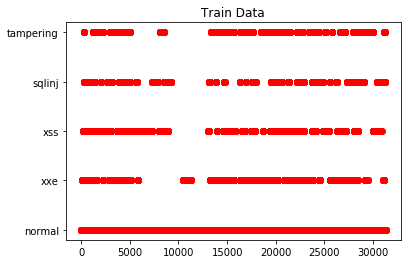

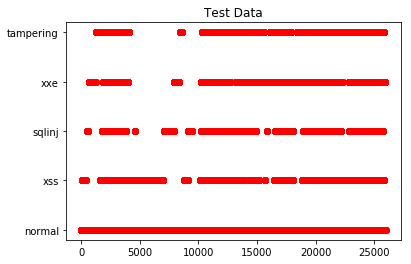

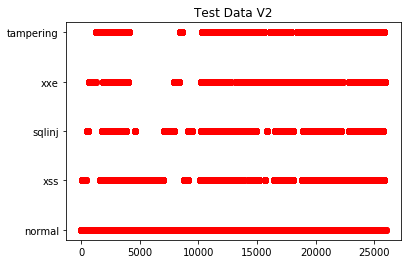

In [7]:
plt.title("Train Data")
plt.plot(train_data['label'], 'ro')
plt.show()
plt.title("Test Data")
plt.plot(test_data['label'], 'ro')
plt.show()
plt.title("Test Data V2")
plt.plot(test_data['label'], 'ro')
plt.show()

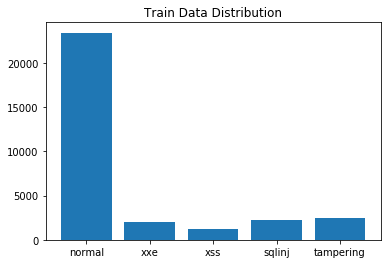

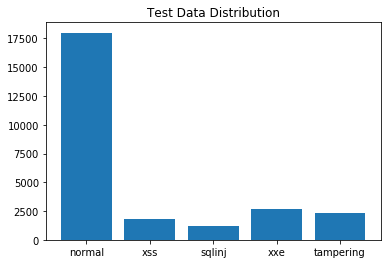

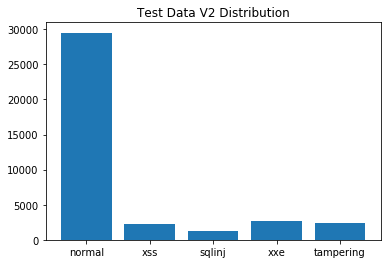

In [8]:
plt.title("Train Data Distribution")
plt.bar(train_data['label'].unique(), train_data.groupby('label').apply(lambda x: len(x)))
plt.show()

plt.title("Test Data Distribution")
plt.bar(test_data['label'].unique(), test_data.groupby('label').apply(lambda x: len(x)))
plt.show()

plt.title("Test Data V2 Distribution")
plt.bar(test_data['label'].unique(), test_data_v2.groupby('label').apply(lambda x: len(x)))
plt.show()

In [0]:
MAX_PARAM_LEN = 7
MAX_BODY_LEN = 15
MAX_REQ_LEN = 4
FEATURES_NUM = 12
TARGET_CLASSES_NUM = 5
METHODS_NUM = 3

In [0]:
seq_length = 30
dropout_rate = 0.5
learning_rate = 1e-4
total_epochs = 10
batch_size = 50
embedding_dim = 100
hidden_size = 50

In [0]:
def tokenize_params(text):
    xx = []
    for idx, word in enumerate(re.split(r'\W+', urllib.parse.unquote(text))):
        if len(xx) == MAX_PARAM_LEN:
            break
        word = word.lower()
        if word != '' and not word.isnumeric():
            xx.append(word)
    return xx

In [0]:
def tokenize_body(text):
    xx = []
    if text == '':
        return xx
    try:
        body_dict = json.loads(text)
    except:
        raise ValueError('Text cannot be evaluated\nText: ' + text)
    for k in body_dict:
        if len(xx) == MAX_BODY_LEN:
            break
        xx.append(k.lower())
        try:
            for idx, word in enumerate(re.split(r'\W+', str(body_dict[k]))):
                if len(xx) == MAX_BODY_LEN:
                    break
                if word != '' and not word.isnumeric():
                    xx.append(word.lower())
        except:
            raise ValueError('Cannot split body_dict at key ' + k + \
                             ' - value: ' +  str(body_dict[k]))
    return xx

In [0]:
def extract_feature(data, vocab_dict=None, vocab_dict2=None, vocab_dict4=None):
    data_matrix_1 = np.zeros(shape=(len(data), MAX_REQ_LEN)) # Embedding of request
    data_matrix_2 = np.zeros(shape=(len(data), MAX_PARAM_LEN)) # Embedding of param
    data_matrix_3 = np.zeros(shape=(len(data), FEATURES_NUM)) # Other features
    data_matrix_4 = np.zeros(shape=(len(data), MAX_BODY_LEN)) # Embedding of req body
    data_label = np.zeros(shape=(len(data), TARGET_CLASSES_NUM))

    data_matrix_3[:, 0:3] = to_categorical(data['method'].apply(method_to_index), num_classes=METHODS_NUM)
    data_matrix_3[:, 3] = data['path'].apply(lambda m: sum([1 for i in m if i in string.punctuation or i.isnumeric()]))
    data_matrix_3[:, 4] = data['path'].apply(lambda m: len(m))
    data_matrix_3[:, 3] += data['params'].apply(lambda m: sum([1 for i in m if i in string.punctuation or i.isnumeric()]))
    data_matrix_3[:, 4] += data['params'].apply(lambda m: len(m))
    data_matrix_3[:, 5] = data['request_body'].apply(lambda r: sum(1 for i in r if i in string.punctuation or i.isnumeric()))
    data_matrix_3[:, 6] = data['request_body'].apply(lambda r: len(r))
    data_matrix_3[:, 7:] = to_categorical(data['response_code'].apply(lambda x: int(x) // 100 - 1), num_classes=5)

    data['request_words'] = data['path'].apply(lambda x: list(filter(lambda y: y != '' and not y.isnumeric(), re.split(r'\W+', x))))
    if vocab_dict is None:
        vocab = set()
        for i in range(len(data)):
            for word in data['request_words'][i]:
                vocab.add(word)
        vocab_dict = {}
        vocab_dict['<unk>'] = 0
        for i, word in enumerate(vocab):
            vocab_dict[word] = i + 1
            
    for i in range(len(data)):
        for j, word in enumerate(data['request_words'][i]):
            if j == MAX_REQ_LEN:
                break
            data_matrix_1[i, j] = vocab_dict.get(word, 0)


    data['param_words'] = data['params'].apply(tokenize_params)
    if vocab_dict2 is None:
        vocab2 = set()
        for i in range(len(data)):
            for word in data['param_words'][i]:
                vocab2.add(word)

        vocab_dict2 = {}
        vocab_dict2['<unk>'] = 0
        for i, word in enumerate(vocab2):
            vocab_dict2[word] = i + 1
    
    for i in range(len(data)):
        for j, word in enumerate(data['param_words'][i]):
            if j == MAX_PARAM_LEN:
                break
            data_matrix_2[i, j] = vocab_dict2.get(word, 0)

            
    data['body_words'] = data['request_body'].apply(tokenize_body)
    if vocab_dict4 is None:
        vocab4 = set()
        for i in range(len(data)):
            for word in data['body_words'][i]:
                vocab4.add(word)

        vocab_dict4 = {}
        vocab_dict4['<unk>'] = 0
        for i, word in enumerate(vocab4):
            vocab_dict4[word] = i + 1
    
    for i in range(len(data)):
        for j, word in enumerate(data['body_words'][i]):
            if j == MAX_BODY_LEN:
                break
            data_matrix_4[i, j] = vocab_dict4.get(word, 0)
            
            

    data_label[:] = to_categorical(data['label'].apply(label_to_index), num_classes=TARGET_CLASSES_NUM)
    
    return data_matrix_1, data_matrix_2, data_matrix_3, data_matrix_4, data_label, vocab_dict, vocab_dict2, vocab_dict4

In [0]:
train_data_matrix_1, train_data_matrix_2, train_data_matrix_3, \
    train_data_matrix_4, train_data_label, vocab_dict, vocab_dict2, \
    vocab_dict4 = extract_feature(train_data)

test_data_matrix_1, test_data_matrix_2, test_data_matrix_3, \
    test_data_matrix_4, test_data_label, _, _, \
    _ = extract_feature(test_data, vocab_dict, vocab_dict2, vocab_dict4)

test_data_v2_matrix_1, test_data_v2_matrix_2, test_data_v2_matrix_3, \
    test_data_v2_matrix_4, test_data_v2_label, _, _, \
    _ = extract_feature(test_data_v2, vocab_dict, vocab_dict2, vocab_dict4)

In [15]:
print(len(vocab_dict))
print(len(vocab_dict2))
print(len(vocab_dict4))

468
164
1475


In [0]:
def dataset_builder(data, label):
    x = np.zeros(shape=(len(data) - seq_length + 1, seq_length, data.shape[-1]))
    y = np.zeros(shape=(len(data) - seq_length + 1, seq_length, TARGET_CLASSES_NUM))
    for i in range(len(data)-seq_length+1):
        x[i, :, :] = data[i:i+seq_length, :]
        y[i, :] = label[i:i+seq_length]
    return x, y

In [0]:
train_data_seq_1, _ = dataset_builder(train_data_matrix_1, train_data_label)
train_data_seq_1 = train_data_seq_1.astype(int)

train_data_seq_2, _ = dataset_builder(train_data_matrix_2, train_data_label)
train_data_seq_2 = train_data_seq_2.astype(int)

train_data_seq_3, _ = dataset_builder(train_data_matrix_3, train_data_label)

train_data_seq_4, train_label_seq = dataset_builder(train_data_matrix_4, train_data_label)
train_data_seq_4 = train_data_seq_4.astype(int)

In [0]:
test_data_seq_1, _ = dataset_builder(test_data_matrix_1, test_data_label)
test_data_seq_1 = test_data_seq_1.astype(int)

test_data_seq_2, _ = dataset_builder(test_data_matrix_2, test_data_label)
test_data_seq_2 = test_data_seq_2.astype(int)

test_data_seq_3, _ = dataset_builder(test_data_matrix_3, test_data_label)

test_data_seq_4, test_label_seq = dataset_builder(test_data_matrix_4, test_data_label)
test_data_seq_4 = test_data_seq_4.astype(int)

In [0]:
test_data_v2_seq_1, _ = dataset_builder(test_data_v2_matrix_1, test_data_v2_label)
test_data_v2_seq_1 = test_data_v2_seq_1.astype(int)

test_data_v2_seq_2, _ = dataset_builder(test_data_v2_matrix_2, test_data_v2_label)
test_data_v2_seq_2 = test_data_v2_seq_2.astype(int)

test_data_v2_seq_3, _ = dataset_builder(test_data_v2_matrix_3, test_data_v2_label)

test_data_v2_seq_4, test_label_v2_seq = dataset_builder(test_data_v2_matrix_4, test_data_v2_label)
test_data_v2_seq_4 = test_data_v2_seq_4.astype(int)

In [20]:
print("Training set 1 shape: %s" % str(train_data_seq_1.shape))
print("Training set 2 shape: %s" % str(train_data_seq_2.shape))
print("Training set 3 shape: %s" % str(train_data_seq_3.shape))
print("Training set 4 shape: %s" % str(train_data_seq_4.shape))
print("Training Label shape: %s" % str(train_label_seq.shape))
print("\n")
print("Testing set 1 shape: %s" % str(test_data_seq_1.shape))
print("Testing set 2 shape: %s" % str(test_data_seq_2.shape))
print("Testing set 3 shape: %s" % str(test_data_seq_3.shape))
print("Testing set 4 shape: %s" % str(test_data_seq_4.shape))
print("Testing Label shape: %s" % str(test_label_seq.shape))
print("\n")
print("Testing V2 set 1 shape: %s" % str(test_data_v2_seq_1.shape))
print("Testing V2 set 2 shape: %s" % str(test_data_v2_seq_2.shape))
print("Testing V2 set 3 shape: %s" % str(test_data_v2_seq_3.shape))
print("Testing V2 set 4 shape: %s" % str(test_data_v2_seq_4.shape))
print("Testing V2 Label shape: %s" % str(test_label_v2_seq.shape))

Training set 1 shape: (31247, 30, 4)
Training set 2 shape: (31247, 30, 7)
Training set 3 shape: (31247, 30, 12)
Training set 4 shape: (31247, 30, 15)
Training Label shape: (31247, 30, 5)


Testing set 1 shape: (25938, 30, 4)
Testing set 2 shape: (25938, 30, 7)
Testing set 3 shape: (25938, 30, 12)
Testing set 4 shape: (25938, 30, 15)
Testing Label shape: (25938, 30, 5)


Testing V2 set 1 shape: (38083, 30, 4)
Testing V2 set 2 shape: (38083, 30, 7)
Testing V2 set 3 shape: (38083, 30, 12)
Testing V2 set 4 shape: (38083, 30, 15)
Testing V2 Label shape: (38083, 30, 5)


In [22]:
in_1 = Input(shape=(seq_length, MAX_REQ_LEN))
in_2 = Input(shape=(seq_length, MAX_PARAM_LEN,))
in_3 = Input(shape=(seq_length, FEATURES_NUM))
in_4 = Input(shape=(seq_length, MAX_BODY_LEN,))

inner_in_1 = Input(shape=(MAX_REQ_LEN,))
embed_1 = Embedding(len(vocab_dict), embedding_dim)(inner_in_1)
dr_1 = Dropout(dropout_rate)(embed_1)
gru_out_1 = Bidirectional(CuDNNGRU(20))(dr_1)
dr_2 = Dropout(dropout_rate)(gru_out_1)
inner_model_1 = Model(inner_in_1, dr_2)

inner_in_1_2 = Input(shape=(MAX_PARAM_LEN,))
embed_1_2 = Embedding(len(vocab_dict2), embedding_dim)(inner_in_1_2)
dr_1_2 = Dropout(dropout_rate)(embed_1_2)
gru_out_1_2 = Bidirectional(CuDNNGRU(20))(dr_1_2)
dr_2_2 = Dropout(dropout_rate)(gru_out_1_2)
inner_model_2 = Model(inner_in_1_2, dr_2_2)

inner_in_1_3 = Input(shape=(MAX_BODY_LEN,))
embed_1_3 = Embedding(len(vocab_dict4), embedding_dim)(inner_in_1_3)
dr_1_3 = Dropout(dropout_rate)(embed_1_3)
gru_out_1_3 = Bidirectional(CuDNNGRU(20))(dr_1_3)
dr_2_3 = Dropout(dropout_rate)(gru_out_1_3)
inner_model_3 = Model(inner_in_1_3, dr_2_3)

td_1 = TimeDistributed(inner_model_1)(in_1)
td_1_2 = TimeDistributed(inner_model_2)(in_2)
td_1_3 = TimeDistributed(inner_model_3)(in_4)

lstm_out_1 = Bidirectional(CuDNNLSTM(hidden_size, return_sequences=True,
                                     kernel_regularizer=l2(1e-5)))(td_1)
lstm_out_1_2 = Bidirectional(CuDNNLSTM(hidden_size, return_sequences=True,
                                       kernel_regularizer=l2(1e-5)))(td_1_2)
lstm_out_1_3 = Bidirectional(CuDNNLSTM(hidden_size, return_sequences=True,
                                       kernel_regularizer=l2(1e-5)))(td_1_3)

lstm_out_2 = Bidirectional(CuDNNLSTM(hidden_size * 2, return_sequences=True))(in_3)

concated = concatenate([lstm_out_1, lstm_out_2, lstm_out_1_2, lstm_out_1_3])
dr_out = Dropout(dropout_rate)(concated)
gru_out_1 = CuDNNGRU(hidden_size * 4, return_sequences=True)(dr_out)
gru_out_2 = GRU(TARGET_CLASSES_NUM, activation='softmax',
                dropout=dropout_rate, return_sequences=True)(gru_out_1)

model = Model(inputs=[in_1, in_2, in_3, in_4], outputs=[gru_out_2])

model.summary()

optimizer = RMSprop(lr=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'], sample_weight_mode='temporal')

sw = np.zeros((len(train_data_seq_1), seq_length))
for i in range(len(train_label_seq)):
    for j in range(len(train_label_seq[i])):
        class_idx = train_label_seq[i, j].argmax()
        if class_idx == 0:
            sw[i, j] = 1.336924
        elif class_idx == 1:
            sw[i, j] = 14.145635
        elif class_idx == 2:
            sw[i, j] = 24.588050
        elif class_idx == 3:
            sw[i, j] = 12.828548
        else:
            sw[i, j] = 15.949006

history = model.fit([train_data_seq_1, train_data_seq_2, train_data_seq_3, train_data_seq_4], train_label_seq,
                   epochs=total_epochs, batch_size=batch_size,
                   sample_weight=sw, validation_split=0.2)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30, 4)        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 30, 7)        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 30, 15)       0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 30, 40)       61440       input_1[0][0]                    
__________________________________________________________________________________________________
input_3 (I

In [23]:
# testing
train_score = model.evaluate([train_data_seq_1, train_data_seq_2, train_data_seq_3, train_data_seq_4], train_label_seq, batch_size=batch_size)
print('Training Loss: {}\n Training Accuracy: {}\n'.format(train_score[0], train_score[1]))

test_score = model.evaluate([test_data_seq_1, test_data_seq_2, test_data_seq_3, test_data_seq_4], test_label_seq, batch_size=batch_size)
print('Testing Loss: {}\n Testing Accuracy: {}\n'.format(test_score[0], test_score[1]))

test_score = model.evaluate([test_data_v2_seq_1, test_data_v2_seq_2, test_data_v2_seq_3, test_data_v2_seq_4], test_label_v2_seq, batch_size=batch_size)
print('Testing V2 Loss: {}\n Testing V2 Accuracy: {}\n'.format(test_score[0], test_score[1]))

31247/31247 [==============================] - 46s 1ms/step
Training Loss: 0.4328901555236742
 Training Accuracy: 0.8364685672416486

25938/25938 [==============================] - 38s 1ms/step
Testing Loss: 0.7983450380599759
 Testing Accuracy: 0.7677191771421521

38083/38083 [==============================] - 56s 1ms/step
Testing V2 Loss: 0.604914897050875
 Testing V2 Accuracy: 0.8095186827776453



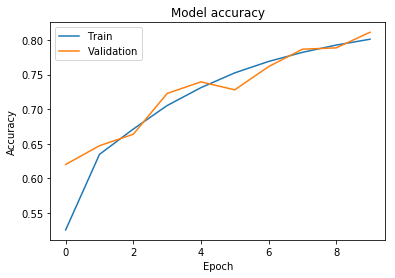

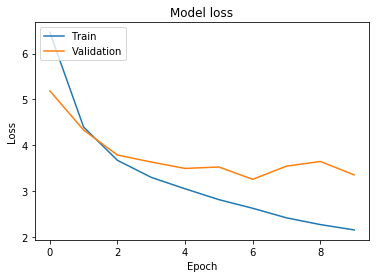

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

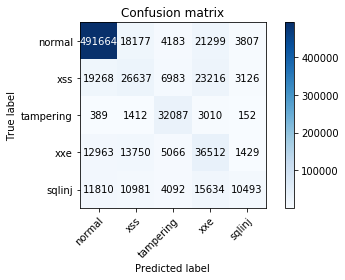

In [25]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

y_pred = model.predict([test_data_seq_1, test_data_seq_2, test_data_seq_3, test_data_seq_4], batch_size=batch_size)

s1 = test_label_seq.shape
s2 = y_pred.shape
# Plot non-normalized confusion matrix
plot_confusion_matrix(np.argmax(test_label_seq.reshape((s1[0]*s1[1], s1[2])), axis=-1),
                      np.argmax(y_pred.reshape((s2[0]*s2[1], s2[2])), axis=-1),
                      classes=['normal', 'xss', 'tampering', 'xxe', 'sqlinj'],
                      title='Confusion matrix')

In [26]:
cm = confusion_matrix(np.argmax(test_label_seq.reshape((s1[0]*s1[1], s1[2])), axis=-1),
                      np.argmax(y_pred.reshape((s2[0]*s2[1], s2[2])), axis=-1))

classes=['normal', 'xss', 'tampering', 'xxe', 'sqlinj']
precs = []
recs = []

for idx, c in enumerate(classes):
    print("%s Metrics:" % c)
    prec = cm[idx][idx] / sum(cm[:, idx])
    rec = cm[idx][idx] / sum(cm[idx])
    print("- Precision: %f" % prec)
    print("- Recall: %f" % rec)
    precs.append(prec)
    recs.append(rec)
    print()
    
print("Average Precision: %f" % (sum(precs) / len(classes)))
print("Average Recall: %f" % (sum(recs) / len(classes)))
print("FPR (Alarm triggered by Non-Atk): %f" % (sum(cm[0][1:]) / (sum(cm[0][:]))))

normal Metrics:
- Precision: 0.917123
- Recall: 0.911958

xss Metrics:
- Precision: 0.375396
- Recall: 0.336198

tampering Metrics:
- Precision: 0.612219
- Recall: 0.866046

xxe Metrics:
- Precision: 0.366325
- Recall: 0.523695

sqlinj Metrics:
- Precision: 0.552060
- Recall: 0.197944

Average Precision: 0.564625
Average Recall: 0.567168
FPR (Alarm triggered by Non-Atk): 0.088042


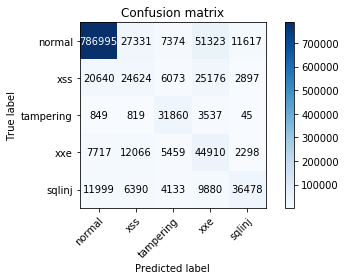

In [27]:
y_pred = model.predict([test_data_v2_seq_1, test_data_v2_seq_2, test_data_v2_seq_3, test_data_v2_seq_4], batch_size=batch_size)

s1 = test_label_v2_seq.shape
s2 = y_pred.shape
# Plot non-normalized confusion matrix
plot_confusion_matrix(np.argmax(test_label_v2_seq.reshape((s1[0]*s1[1], s1[2])), axis=-1),
                      np.argmax(y_pred.reshape((s2[0]*s2[1], s2[2])), axis=-1),
                      classes=['normal', 'xss', 'tampering', 'xxe', 'sqlinj'],
                      title='Confusion matrix')

In [28]:
cm = confusion_matrix(np.argmax(test_label_v2_seq.reshape((s1[0]*s1[1], s1[2])), axis=-1),
                      np.argmax(y_pred.reshape((s2[0]*s2[1], s2[2])), axis=-1))

classes=['normal', 'xss', 'tampering', 'xxe', 'sqlinj']
precs = []
recs = []

for idx, c in enumerate(classes):
    print("%s Metrics:" % c)
    prec = cm[idx][idx] / sum(cm[:, idx])
    rec = cm[idx][idx] / sum(cm[idx])
    print("- Precision: %f" % prec)
    print("- Recall: %f" % rec)
    precs.append(prec)
    recs.append(rec)
    print()
    
print("Average Precision: %f" % (sum(precs) / len(classes)))
print("Average Recall: %f" % (sum(recs) / len(classes)))
print("FPR (Alarm triggered by Non-Atk): %f" % (sum(cm[0][1:]) / (sum(cm[0][:]))))

normal Metrics:
- Precision: 0.950248
- Recall: 0.889622

xss Metrics:
- Precision: 0.345697
- Recall: 0.310087

tampering Metrics:
- Precision: 0.580338
- Recall: 0.858529

xxe Metrics:
- Precision: 0.333096
- Recall: 0.619876

sqlinj Metrics:
- Precision: 0.683941
- Recall: 0.529588

Average Precision: 0.578664
Average Recall: 0.641540
FPR (Alarm triggered by Non-Atk): 0.110378


In [0]:
TP = 0
FP = 0
TN = 0
FN = 0

In [32]:
# y_pred.shape
# test_label_v2_seq.shape
for i in range(len(y_pred)):
    for j in range(len(y_pred[i])):
        if y_pred[i][j].argmax() == 0 and test_label_v2_seq[i][j].argmax() == 0:
            TN += 1
        elif y_pred[i][j].argmax() != 0 and test_label_v2_seq[i][j].argmax() == 0:
            FN += 1
        elif y_pred[i][j].argmax() == 0 and test_label_v2_seq[i][j].argmax() != 0:
            FP += 1
        elif y_pred[i][j].argmax() != 0 and test_label_v2_seq[i][j].argmax() != 0:
            TP += 1
            
            
print("Precision (Atk - Non):", TP / (TP + FP))
print("Recall (Atk - Non):", TP / (TP + FN))

Precision (Atk - Non): 0.840197789412449
Recall (Atk - Non): 0.6893156002418149
